# Airline Arrivals Project

## Start

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [ ]:
root = "/content/drive/My Drive/Data Analytic/AirlineArrivals/"
# /content/drive/My Drive/Data Analytic/AirlineArrivals/769941352_T_ONTIME_REPORTING-1.csv

##  Synthesis and preprocessing data 

In [ ]:
def readfile(root) -> pd.DataFrame:
  li = []
  import glob
  allfile = glob.glob(root+"*.csv")
  for onefile in allfile:
    # namefile = onefile.split("/")[-1]
    df = pd.read_csv(onefile,index_col= 0)
    column = df.columns
    li.append(df)
  
  return pd.concat(li,axis =0 ,ignore_index = True)

df = readfile(root)
df.drop("Unnamed: 48",axis = 1,inplace= True)


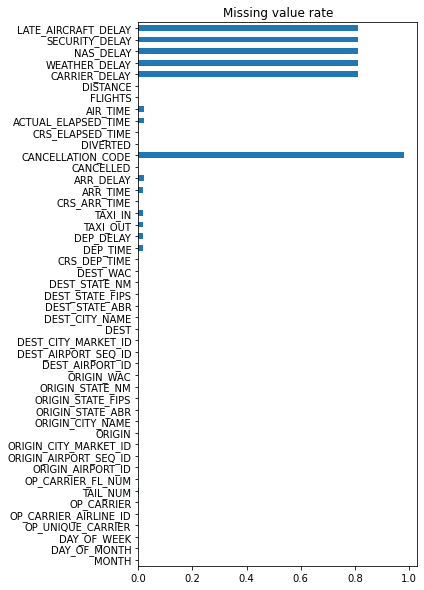

In [ ]:
plt.figure(figsize=(5,10))
dfs = df.isnull().sum()/df.shape[0]
dfs.plot.barh()
plt.title("Missing value rate");

In [ ]:
# delete col missing value > 0.2%
df.drop(dfs.index[dfs>0.2],axis =1,inplace = True)

In [ ]:
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE
0,1,3,4,9E,20363,9E,N195PQ,5121,15412,1541205,35412,TYS,"Knoxville, TN",TN,47,Tennessee,54,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,1140,1205.0,25.0,30.0,4.0,1250,1315.0,25.0,0.0,0.0,70.0,70.0,36.0,1.0,152.0
1,1,4,5,9E,20363,9E,N919XJ,5121,15412,1541205,35412,TYS,"Knoxville, TN",TN,47,Tennessee,54,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,1140,1250.0,70.0,35.0,9.0,1250,1412.0,82.0,0.0,0.0,70.0,82.0,38.0,1.0,152.0
2,1,5,6,9E,20363,9E,N316PQ,5122,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,14783,1478302,34783,SGF,"Springfield, MO",MO,29,Missouri,64,950,956.0,6.0,20.0,3.0,1051,1043.0,-8.0,0.0,0.0,121.0,107.0,84.0,1.0,563.0
3,1,6,7,9E,20363,9E,N325PQ,5122,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,14783,1478302,34783,SGF,"Springfield, MO",MO,29,Missouri,64,950,945.0,-5.0,16.0,3.0,1053,1029.0,-24.0,0.0,0.0,123.0,104.0,85.0,1.0,563.0
4,1,7,1,9E,20363,9E,N904XJ,5122,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,14783,1478302,34783,SGF,"Springfield, MO",MO,29,Missouri,64,950,947.0,-3.0,25.0,4.0,1053,1044.0,-9.0,0.0,0.0,123.0,117.0,88.0,1.0,563.0


In [ ]:
dfs = df.apply(lambda x: len(x.unique()))
print(dfs)
dfs = dfs.reset_index() # table unique 

MONTH                      12
DAY_OF_MONTH               31
DAY_OF_WEEK                 7
OP_UNIQUE_CARRIER          17
OP_CARRIER_AIRLINE_ID      17
OP_CARRIER                 17
TAIL_NUM                 5892
OP_CARRIER_FL_NUM        7089
ORIGIN_AIRPORT_ID         360
ORIGIN_AIRPORT_SEQ_ID     394
ORIGIN_CITY_MARKET_ID     334
ORIGIN                    360
ORIGIN_CITY_NAME          352
ORIGIN_STATE_ABR           52
ORIGIN_STATE_FIPS          52
ORIGIN_STATE_NM            52
ORIGIN_WAC                 52
DEST_AIRPORT_ID           360
DEST_AIRPORT_SEQ_ID       394
DEST_CITY_MARKET_ID       334
DEST                      360
DEST_CITY_NAME            352
DEST_STATE_ABR             52
DEST_STATE_FIPS            52
DEST_STATE_NM              52
DEST_WAC                   52
CRS_DEP_TIME             1379
DEP_TIME                 1441
DEP_DELAY                1595
TAXI_OUT                  188
TAXI_IN                   217
CRS_ARR_TIME             1436
ARR_TIME                 1441
ARR_DELAY 

Nhận xét: 

In [ ]:
col = dfs[~dfs["index"].str.contains("ORIGIN_") & ~dfs["index"].str.contains("DEST_") ][dfs[0]>2]["index"].values
df = df[col]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422037 entries, 0 to 7422036
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   MONTH                  int64  
 1   DAY_OF_MONTH           int64  
 2   DAY_OF_WEEK            int64  
 3   OP_UNIQUE_CARRIER      object 
 4   OP_CARRIER_AIRLINE_ID  int64  
 5   OP_CARRIER             object 
 6   TAIL_NUM               object 
 7   OP_CARRIER_FL_NUM      int64  
 8   ORIGIN                 object 
 9   DEST                   object 
 10  CRS_DEP_TIME           int64  
 11  DEP_TIME               float64
 12  DEP_DELAY              float64
 13  TAXI_OUT               float64
 14  TAXI_IN                float64
 15  CRS_ARR_TIME           int64  
 16  ARR_TIME               float64
 17  ARR_DELAY              float64
 18  CRS_ELAPSED_TIME       float64
 19  ACTUAL_ELAPSED_TIME    float64
 20  AIR_TIME               float64
 21  DISTANCE               float64
dtypes: float64(10), in

In [ ]:
df.to_csv(root+"Airlinearrivals-2019.csv")

## Explore Data

In [ ]:
df = pd.read_csv(root+"Airlinearrivals-2019.csv")
df = df.drop("Unnamed: 0",axis = 1)

In [ ]:
df.shape

(7422037, 22)

In [ ]:
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE
0,1,3,4,9E,20363,9E,N195PQ,5121,TYS,ATL,1140,1205.0,25.0,30.0,4.0,1250,1315.0,25.0,70.0,70.0,36.0,152.0
1,1,4,5,9E,20363,9E,N919XJ,5121,TYS,ATL,1140,1250.0,70.0,35.0,9.0,1250,1412.0,82.0,70.0,82.0,38.0,152.0
2,1,5,6,9E,20363,9E,N316PQ,5122,ATL,SGF,950,956.0,6.0,20.0,3.0,1051,1043.0,-8.0,121.0,107.0,84.0,563.0
3,1,6,7,9E,20363,9E,N325PQ,5122,ATL,SGF,950,945.0,-5.0,16.0,3.0,1053,1029.0,-24.0,123.0,104.0,85.0,563.0
4,1,7,1,9E,20363,9E,N904XJ,5122,ATL,SGF,950,947.0,-3.0,25.0,4.0,1053,1044.0,-9.0,123.0,117.0,88.0,563.0


In [ ]:
df.OP_CARRIER_FL_NUM.unique()

array([5121, 5122, 5123, ..., 6980, 6981, 6471])

**Describe**
* "OP_UNIQUE_CARRIER" : 
* "OP_CARRIER_AIRLINE_ID" :
* "OP_CARRIER" : 	unique carrier code
* "TAIL_NUM" : 	plane tail number
* "OP_CARRIER_FL_NUM" : Flight number
* "ORIGIN" : Place of departure
* "DEST" : Destination
* "CRS_DEP_TIME" : 	scheduled departure time (local, hhmm)
* "DEP_TIME" : actual departure time (local, hhmm)
* "DEP_DELAY" : departure delay (minutes)
* "TAXI_OUT" : 	taxi in time (minutes)
* "TAXI_IN" : taxi out time (minutes)
* "CRS_ARR_TIME" : scheduled arrival time (local, hhmm)
* "ARR_TIME" : 	actual arrival time (local, hhmm)
* "ARR_DELAY" : arrival delay (minute)
* "CRS_ELAPSED_TIME" : CRS Elapsed Time of Flight (minutes)
* "ACTUAL_ELAPSED_TIME" : Elapsed Time of Flight(minutes)
* "AIR_TIME" : Flight Time  (minutes)
* "DISTANCE" : Distance between airports  (miles)


In [ ]:
pd.set_option('float_format', '{:0.2f}'.format)
df.describe()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_AIRLINE_ID,OP_CARRIER_FL_NUM,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE
count,7422037.00,7422037.00,7422037.00,7422037.00,7422037.00,7422037.00,7291951.00,7291927.00,7288060.00,7284390.00,7422037.00,7284391.00,7268232.00,7421902.00,7268232.00,7268232.00,7422037.00
mean,6.58,15.73,3.94,19986.76,2557.20,1330.26,1334.61,10.92,17.39,7.74,1485.79,1462.96,5.41,141.90,136.69,111.57,800.54
std,3.40,8.76,2.00,374.75,1799.41,492.99,507.20,48.96,10.00,6.19,521.47,542.45,51.07,72.35,72.61,70.56,592.51
min,1.00,1.00,1.00,19393.00,1.00,1.00,1.00,-82.00,1.00,1.00,1.00,1.00,-99.00,1.00,15.00,4.00,31.00
25%,4.00,8.00,2.00,19790.00,1025.00,913.00,914.00,-5.00,11.00,4.00,1100.00,1046.00,-15.00,90.00,84.00,60.00,369.00
50%,7.00,16.00,4.00,19977.00,2158.00,1321.00,1327.00,-2.00,15.00,6.00,1515.00,1504.00,-6.00,124.00,119.00,93.00,640.00
75%,10.00,23.00,6.00,20368.00,3917.00,1736.00,1746.00,7.00,20.00,9.00,1921.00,1917.00,7.00,171.00,167.00,141.00,1034.00
max,12.00,31.00,7.00,20452.00,7933.00,2359.00,2400.00,2710.00,227.00,316.00,2400.00,2400.00,2695.00,948.00,1604.00,1557.00,5095.00


In [ ]:
df.describe(include = "O")

,OP_UNIQUE_CARRIER,OP_CARRIER,TAIL_NUM,ORIGIN,DEST
count,7422037,7422037,7404200,7422037,7422037
unique,17,17,5891,360,360
top,WN,WN,N485HA,ATL,ATL
freq,1363946,1363946,3697,395009,395026


In [ ]:
df.drop(["OP_UNIQUE_CARRIER","OP_CARRIER_AIRLINE_ID"],axis = 1,inplace=True);

In [ ]:
df.isnull().sum() # missing value

MONTH                  0
DAY_OF_MONTH           0
DAY_OF_WEEK            0
OP_CARRIER             0
TAIL_NUM               0
OP_CARRIER_FL_NUM      0
ORIGIN                 0
DEST                   0
CRS_DEP_TIME           0
DEP_TIME               0
DEP_DELAY              0
TAXI_OUT               0
TAXI_IN                0
CRS_ARR_TIME           0
ARR_TIME               0
ARR_DELAY              0
CRS_ELAPSED_TIME       0
ACTUAL_ELAPSED_TIME    0
AIR_TIME               0
DISTANCE               0
dtype: int64

## Preprocessing Data

Use this dataset of airline arrival information to predict how late flights
will be. A flight only counts as late if it is more than 30 minutes late.
1. The project should follow guideline as previous projects.
2. Apply models in Naïve Bayes, Logistic Regression, Decision Tree, Random Forest, Gradient Boosting and SVM.
3. Apply PCA, SelectKBest and RFE for feature selections.
4. Using gridsearchCV to obtain best parameters for models.
5. Compare performances among models, write up analysis
why the model is good or bad in the algorithmic approach
(explain why the algorithm is good or bad for the dataset
structure, can you do something to improve the model?)
6. Include the conclusions.




In [ ]:
df.dropna(inplace=True)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7268232 entries, 0 to 7422036
Data columns (total 20 columns):
 #   Column               Dtype  
---  ------               -----  
 0   MONTH                int64  
 1   DAY_OF_MONTH         int64  
 2   DAY_OF_WEEK          int64  
 3   OP_CARRIER           object 
 4   TAIL_NUM             object 
 5   OP_CARRIER_FL_NUM    int64  
 6   ORIGIN               object 
 7   DEST                 object 
 8   CRS_DEP_TIME         int64  
 9   DEP_TIME             float64
 10  DEP_DELAY            float64
 11  TAXI_OUT             float64
 12  TAXI_IN              float64
 13  CRS_ARR_TIME         int64  
 14  ARR_TIME             float64
 15  ARR_DELAY            float64
 16  CRS_ELAPSED_TIME     float64
 17  ACTUAL_ELAPSED_TIME  float64
 18  AIR_TIME             float64
 19  DISTANCE             float64
dtypes: float64(10), int64(6), object(4)
memory usage: 1.1+ GB


In [ ]:
df.shape

(7268232, 20)

# Prapare data

In [ ]:
y = df["ARR_DELAY"].apply(lambda x: 1 if x > 30 else 0)
y.value_counts()

0    6389697
1     878535
Name: ARR_DELAY, dtype: int64

In [ ]:
df.select_dtypes(include=np.object).apply(lambda x: len(x.unique()))

OP_CARRIER      17
TAIL_NUM      5886
ORIGIN         360
DEST           360
dtype: int64

In [ ]:
x = df.drop("ARR_DELAY",axis = 1)

In [ ]:
x["TAIL_NUM"] = x["TAIL_NUM"].map(pd.DataFrame(df["TAIL_NUM"].unique()).reset_index().set_index(0).to_dict()["index"])

In [ ]:
assert (np.sort(x["ORIGIN"].unique())== np.sort(x["DEST"].unique())).all()

In [ ]:
match = pd.DataFrame(df["ORIGIN"].unique()).reset_index().set_index(0).to_dict()["index"]
x[["ORIGIN","DEST"]] = x[["ORIGIN","DEST"]].apply(lambda x:x.map(match))
x["OP_CARRIER"] = x["OP_CARRIER"].map(pd.DataFrame(df["OP_CARRIER"].unique()).reset_index().set_index(0).to_dict()["index"])

In [ ]:
x["DEP_DELAY"] = (x["DEP_DELAY"] + 82) # chuyen moc thoi gian dung gio 0 len 82

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.25,random_state = 1)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2,random_state = 1)

In [ ]:

print("Size Train", X_train.shape) # 9
print("Size Test", X_test.shape) # 5
print("Size Valid", X_val.shape)  # 8

Size Train (4360939, 19)
Size Test (1090235, 19)
Size Valid (1817058, 19)


# Training model

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE,SelectKBest, chi2
from sklearn.metrics import classification_report, accuracy_score ,make_scorer
import time
from sklearn.linear_model import LogisticRegression

## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB() # 10-5,
t0 = time.time()
gnb.fit(X_train, y_train)
t = time.time() - t0
y_pred = gnb.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97    958065
           1       0.75      0.93      0.83    132170

    accuracy                           0.95   1090235
   macro avg       0.87      0.94      0.90   1090235
weighted avg       0.96      0.95      0.96   1090235



In [ ]:
def saveresults(root : str,namemodel:str,acc :float,h :float):
  kq = {}
  kq["Model"] = namemodel
  kq["Accuracy"] = acc
  kq["Time"] = h
  kq1 = pd.DataFrame()
  kq1 = kq1.append(kq,ignore_index=True)
  print(kq1)
  kq1.to_csv(root+ 'results.csv', mode='a', header=False)

# saveresults(root,namemodel = "Naive Bayes", acc = accuracy_score(y_test,y_pred),h = t)

Turning

In [ ]:
parameters = {"var_smoothing":(0.001,0.0001,0.00001,0.000001,0.0000001,0.00000001)}

gnb = GaussianNB()
clf = GridSearchCV(gnb,parameters)
clf.fit(X_train,y_train)

pd.DataFrame(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_var_smoothing,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.725397,0.504477,0.384139,0.158019,0.001,{'var_smoothing': 0.001},0.911972,0.912076,0.911951,0.912235,0.912351,0.912117,0.000154,6
1,1.467696,0.009433,0.306526,0.003879,0.0001,{'var_smoothing': 0.0001},0.953324,0.953614,0.953124,0.953464,0.953603,0.953426,0.000184,5
2,1.457646,0.014242,0.307794,0.003917,1e-05,{'var_smoothing': 1e-05},0.967074,0.967467,0.966867,0.967294,0.967044,0.967149,0.000209,1
3,1.474623,0.010571,0.314694,0.005818,1e-06,{'var_smoothing': 1e-06},0.956799,0.956556,0.956296,0.956560,0.956453,0.956533,0.000164,2
4,1.489117,0.008747,0.311446,0.001661,1e-07,{'var_smoothing': 1e-07},0.954716,0.954511,0.954099,0.954459,0.954232,0.954404,0.000216,3
5,1.459877,0.007893,0.308620,0.001963,1e-08,{'var_smoothing': 1e-08},0.954485,0.954306,0.953909,0.954235,0.954035,0.954194,0.000203,4


In [ ]:
best_params = clf.best_params_
best_params

{'var_smoothing': 1e-05}

SelectKbest

In [ ]:
s = SelectKBest(chi2, k=10)
X_new = s.fit_transform(X_train, y_train) # error X have negative values
s.get_support()

array([False, False, False, False,  True,  True, False, False,  True,
        True,  True,  True,  True,  True,  True, False,  True, False,
       False])

In [ ]:
X_new = X_train[X_train.columns[s.get_support()]]
X_new_test = X_test[X_train.columns[s.get_support()]]

In [ ]:
gnb = GaussianNB() # 10-5,
t0 = time.time()
gnb.fit(X_new, y_train)
t = time.time() - t0
y_pred = gnb.predict(X_new_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97    958065
           1       0.76      0.93      0.83    132170

    accuracy                           0.95   1090235
   macro avg       0.87      0.94      0.90   1090235
weighted avg       0.96      0.95      0.96   1090235



RFE

In [ ]:
hyper_params = [{'n_features_to_select': list(range(1, 20))}]
gnb = GaussianNB() 
gnb.fit(X_train, y_train)
rfe = RFE(gnb)

model_cv = GridSearchCV(estimator = rfe,  param_grid = hyper_params  ,verbose = 1,return_train_score=True)    
model_cv.fit(X_train, y_train)

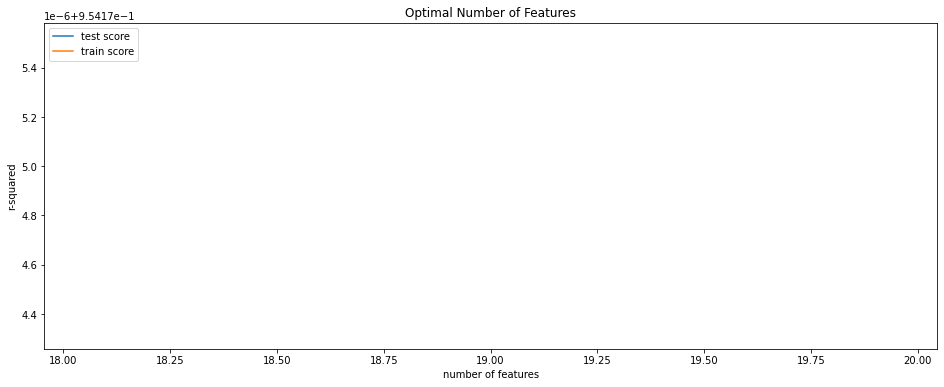

In [ ]:
cv_results = pd.DataFrame(model_cv.cv_results_)
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

PCA 

In [ ]:
pa = PCA(0.95)
pa.fit(X_train)
X_pca = pa.transform(X_train)
X_val_pca = pa.transform(X_val)
gnb = GaussianNB() 
t0 = time.time()
gnb.fit(X_train, y_train)
t = time.time() - t0
y_pred = gnb.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97    958065
           1       0.75      0.93      0.83    132170

    accuracy                           0.95   1090235
   macro avg       0.87      0.94      0.90   1090235
weighted avg       0.96      0.95      0.96   1090235



##  Logictics Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0)
t0 = time.time()
clf.fit(X_train,y_train)
t = time.time() - t0
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

           0       0.98      0.99      0.98    958065
           1       0.89      0.88      0.89    132170

    accuracy                           0.97   1090235
   macro avg       0.94      0.93      0.94   1090235
weighted avg       0.97      0.97      0.97   1090235



In [ ]:
saveresults(root,namemodel = "Logictics Regression", acc = accuracy_score(y_test,y_pred),h = t)

   Accuracy                 Model       Time
0  0.972657  Logictics Regression  72.247204


Fine turning

In [ ]:
parameters = {"C":(0.01,0.1,1,10,100,1000,10000)}

clf = LogisticRegression(random_state=0)
clf = GridSearchCV(clf,parameters)
clf.fit(X_train,y_train)

pd.DataFrame(clf.cv_results_)

In [ ]:
pd.DataFrame(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,60.804736,0.574058,0.236927,0.071739,0.01,{'C': 0.01},0.973531,0.973417,0.972461,0.972712,0.972519,0.972928,0.000455,7
1,60.333826,1.476431,0.214660,0.023177,0.1,{'C': 0.1},0.973732,0.974597,0.972764,0.973053,0.973991,0.973627,0.000657,2
2,59.442367,0.746346,0.200805,0.008380,1,{'C': 1},0.974409,0.973824,0.973150,0.973824,0.973220,0.973686,0.000462,1
3,60.121191,1.415910,0.197331,0.003960,10,{'C': 10},0.973392,0.973389,0.972963,0.972560,0.973581,0.973177,0.000369,3
4,60.245566,1.003485,0.199128,0.005702,100,{'C': 100},0.973768,0.973440,0.973314,0.971823,0.973274,0.973124,0.000673,4
5,60.072155,1.203254,0.200381,0.004753,1000,{'C': 1000},0.973452,0.973414,0.973345,0.971831,0.973205,0.973049,0.000615,5
6,60.310360,1.149000,0.200475,0.005353,10000,{'C': 10000},0.973444,0.973413,0.973044,0.971833,0.973376,0.973022,0.000612,6


SelectKbest 

In [ ]:
clf = LogisticRegression(random_state=0)
t0 = time.time()
clf.fit(X_new,y_train)
t = time.time() - t0
y_pred = clf.predict(X_new_test)

print(classification_report(y_test, y_pred))
print("Time : %d (s)" % t)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

           0       0.91      0.99      0.95    958065
           1       0.77      0.32      0.45    132170

    accuracy                           0.91   1090235
   macro avg       0.84      0.65      0.70   1090235
weighted avg       0.90      0.91      0.89   1090235

Time : 65 (s)


In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred ,average='binary')

0.4523651753842207

Rfe

In [ ]:
hyper_params = [{'n_features_to_select': list(range(1, 3))}]

clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)
rfe = RFE(clf)

model_cv = GridSearchCV(estimator = rfe,  param_grid = hyper_params  ,verbose = 1,return_train_score=True)    
model_cv.fit(X_train, y_train)

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)
t0 = time.time()
clf.fit(X_train,y_train)
t= time.time() - t0
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    958065
           1       0.95      0.95      0.95    132170

    accuracy                           0.99   1090235
   macro avg       0.97      0.97      0.97   1090235
weighted avg       0.99      0.99      0.99   1090235



In [ ]:
clf = DecisionTreeClassifier(criterion = "entropy",random_state=0)
t0 = time.time()
clf.fit(X_train,y_train)
t= time.time() - t0
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    958065
           1       0.96      0.96      0.96    132170

    accuracy                           0.99   1090235
   macro avg       0.98      0.98      0.98   1090235
weighted avg       0.99      0.99      0.99   1090235



In [ ]:
clf.get_depth()

63

In [ ]:
saveresults(root,namemodel = "Decision Tree", acc = accuracy_score(y_test,y_pred),h = t)

   Accuracy          Model        Time
0  0.988351  Decision Tree  172.967196


Fine turning

In [ ]:
parameters = {"max_depth":(30,40,50,60,70,80)}

clf = DecisionTreeClassifier(random_state=0)
clf = GridSearchCV(clf,parameters)
clf.fit(X_train,y_train)

pd.DataFrame(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,136.267950,2.368149,0.234669,0.022473,30,{'max_depth': 30},0.987246,0.986841,0.987735,0.986677,0.987038,0.987108,0.000367,6
1,129.871400,0.828997,0.249702,0.002055,40,{'max_depth': 40},0.987373,0.986973,0.988045,0.986903,0.987273,0.987314,0.000406,5
2,129.434300,2.999490,0.251170,0.002625,50,{'max_depth': 50},0.987418,0.986957,0.988044,0.987013,0.987292,0.987345,0.000389,4
3,129.688355,2.033882,0.255558,0.027615,60,{'max_depth': 60},0.987418,0.986964,0.988079,0.987013,0.987292,0.987353,0.000401,1
4,129.618965,2.799695,0.239244,0.013233,70,{'max_depth': 70},0.987418,0.986964,0.988079,0.987013,0.987292,0.987353,0.000401,1
5,130.000233,2.954311,0.244162,0.008649,80,{'max_depth': 80},0.987418,0.986964,0.988079,0.987013,0.987292,0.987353,0.000401,1


SelectKbest

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion = "entropy",random_state=0)
t0 = time.time()
clf.fit(X_new,y_train)
t= time.time() - t0
y_pred = clf.predict(X_new_test)


print(classification_report(y_test, y_pred))
print("Time : %d (s)" % t)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98    958065
           1       0.87      0.87      0.87    132170

    accuracy                           0.97   1090235
   macro avg       0.93      0.92      0.93   1090235
weighted avg       0.97      0.97      0.97   1090235

Time : 143 (s)


In [ ]:
f1_score(y_test,y_pred ,average='binary')

0.8686717968915685

## Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=0,max_depth = 20)
t0 = time.time()
clf.fit(X_train, y_train)
t = time.time() - t0
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    958065
           1       0.96      0.91      0.94    132170

    accuracy                           0.99   1090235
   macro avg       0.98      0.95      0.96   1090235
weighted avg       0.98      0.99      0.98   1090235



In [ ]:
saveresults(root,namemodel = "Random forest", acc = accuracy_score(y_test,y_pred),h = t)

   Accuracy          Model         Time
0  0.985095  Random forest  2431.458481


SelectKbest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=0,max_depth = 20)
t0 = time.time()
clf.fit(X_new, y_train)
t = time.time() - t0
y_pred = clf.predict(X_new_test)

print(classification_report(y_test, y_pred))
print("Time : %d (s)" % t)
print("F1_score : ",f1_score(y_test,y_pred ,average='binary'))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99    958065
           1       0.94      0.89      0.91    132170

    accuracy                           0.98   1090235
   macro avg       0.96      0.94      0.95   1090235
weighted avg       0.98      0.98      0.98   1090235

Time : 3160 (s)


In [ ]:
f1_score(y_test,y_pred ,average='binary')

0.9138208718914639

## Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(random_state=0)
t0 = time.time()
clf.fit(X_train, y_train)
t = time.time() - t0
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99    958065
           1       0.94      0.89      0.91    132170

    accuracy                           0.98   1090235
   macro avg       0.96      0.94      0.95   1090235
weighted avg       0.98      0.98      0.98   1090235



In [ ]:
saveresults(root,namemodel = "Gradient Boosting", acc = accuracy_score(y_test,y_pred),h = t)

   Accuracy              Model         Time
0   0.97926  Gradient Boosting  2575.284969


SelectKbest

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(random_state=0)
t0 = time.time()
clf.fit(X_new, y_train)
t = time.time() - t0
y_pred = clf.predict(X_new_test)

print(classification_report(y_test, y_pred))
print("Time : %d (s)" % t)
print("F1_score : ",f1_score(y_test,y_pred ,average='binary'))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99    958065
           1       0.93      0.87      0.90    132170

    accuracy                           0.98   1090235
   macro avg       0.95      0.93      0.94   1090235
weighted avg       0.98      0.98      0.98   1090235

Time : 1430 (s)
F1_score :  0.8989314024271429


## SVM

In [ ]:
import time
from sklearn.svm import SVC

In [ ]:
from sklearn.svm import SVC

# kernel linear

clf = SVC(kernel = "linear",C= 1000,max_iter = 2000) # 100 - 4000 : 0.55 , 100 - 3000 : 0.57 , 100-2000: 6.1 , 100-1000: 0.73, 100-500 : 0.56
t0 = time.time()
clf.fit(X_train, y_train) # 500 - 1000: 0.73 ,  10000 - 1500 : 0.83
t = time.time() - t0
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


              precision    recall  f1-score   support

           0       0.90      0.63      0.74    958065
           1       0.15      0.47      0.23    132170

    accuracy                           0.61   1090235
   macro avg       0.52      0.55      0.48   1090235
weighted avg       0.81      0.61      0.68   1090235



In [ ]:
# kernel rbf
clf = SVC(kernel = "rbf",C=10000,max_iter = 6000 ,gamma = 0.001) # 1000 : 4000 is goodb 10000 : 4000 0.96 0
t0 = time.time()
clf.fit(X_train, y_train)
t = time.time() - t0
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=6000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


              precision    recall  f1-score   support

           0       0.88      1.00      0.94    958065
           1       0.58      0.00      0.01    132170

    accuracy                           0.88   1090235
   macro avg       0.73      0.50      0.47   1090235
weighted avg       0.84      0.88      0.82   1090235



In [ ]:
saveresults(root,namemodel = "SVM", acc = accuracy_score(y_test,y_pred),h = t)

PCA

SelectKBest 

Turning model with GridsearchCV

In [ ]:
parameters = {"C":(100,1000,10000),"max_iter" :(1000,1500)}

clf = SVC(kernel = "linear") # 100 - 4000 : 0.55 , 100 - 3000 : 0.57 , 100-2000: 6.1 , 100-1000: 0.73, 100-500 : 0.56
t0 = time.time() # 500 - 1000: 0.73 ,  10000 - 1500 : 0.83
clf = GridSearchCV(clf,parameters)
clf.fit(X_train,y_train)
t = time.time() - t0
print("Time : %d (s)" % t)
pd.DataFrame(clf.cv_results_)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_

Time : 9579 (s)


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,234.522886,6.677163,15.840375,0.989278,100,1000,"{'C': 100, 'max_iter': 1000}",0.705214,0.864050,0.546828,0.446548,0.619485,0.636425,0.142065,1
1,349.024867,7.914555,20.815791,1.177453,100,1500,"{'C': 100, 'max_iter': 1500}",0.449229,0.343373,0.592549,0.594736,0.625745,0.521127,0.107917,4
2,233.342351,6.198628,15.826227,0.973180,1000,1000,"{'C': 1000, 'max_iter': 1000}",0.705214,0.864050,0.546828,0.446548,0.619485,0.636425,0.142065,1
3,348.580723,7.782097,20.911598,1.113975,1000,1500,"{'C': 1000, 'max_iter': 1500}",0.449229,0.343373,0.592549,0.594736,0.625745,0.521127,0.107917,4
4,233.112247,6.543644,16.019204,0.900362,10000,1000,"{'C': 10000, 'max_iter': 1000}",0.705214,0.864050,0.546828,0.446548,0.619485,0.636425,0.142065,1
5,348.146615,7.824429,21.034110,1.097347,10000,1500,"{'C': 10000, 'max_iter': 1500}",0.449229,0.343373,0.592549,0.594736,0.625745,0.521127,0.107917,4


## Select model and Evaluate 

## Conclusions